In [90]:
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv('Passengers.csv', usecols = ['Year','Month','DOMESTIC','INTERNATIONAL','TOTAL'])
df.head()

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
0,2002,10,48054917,9578435,57633352
1,2002,11,44850246,9016535,53866781
2,2002,12,49684353,10038794,59723147
3,2003,1,43032450,9726436,52758886
4,2003,2,41166780,8283372,49450152


In [92]:
df.describe()

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
count,248.000000,248.000000,2.480000e+02,2.480000e+02,2.480000e+02
mean,2012.584677,6.483871,5.484616e+07,1.389013e+07,6.873628e+07
std,5.989269,3.481551,1.031117e+07,4.283557e+06,1.420381e+07
min,2002.000000,1.000000,2.879712e+06,3.729150e+05,3.281041e+06
25%,2007.000000,3.000000,5.048308e+07,1.167299e+07,6.272726e+07
50%,2013.000000,6.000000,5.586459e+07,1.369708e+07,6.977755e+07
75%,2018.000000,10.000000,6.048862e+07,1.660171e+07,7.690114e+07
max,2023.000000,12.000000,7.528192e+07,2.390786e+07,9.918978e+07


In [93]:
df.shape

(248, 5)

In [94]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Year           248 non-null    int64
 1   Month          248 non-null    int64
 2   DOMESTIC       248 non-null    int64
 3   INTERNATIONAL  248 non-null    int64
 4   TOTAL          248 non-null    int64
dtypes: int64(5)
memory usage: 9.8 KB


In [95]:
grouped_df = df.groupby('Year')[['DOMESTIC','INTERNATIONAL', 'TOTAL']].sum().reset_index()
grouped_df

,Year,DOMESTIC,INTERNATIONAL,TOTAL
0,2002,142589516,28633764,171223280
1,2003,583293766,117569855,700863621
2,2004,629769616,133940075,763709691
3,2005,657261487,143588422,800849909
4,2006,658362620,149740591,808103211
5,2007,679185450,156324972,835510422
6,2008,651710182,158111711,809821893
7,2009,618067255,149749333,767816588
8,2010,629537593,157940463,787478056
9,2011,638247667,163887126,802134793


In [96]:
x = grouped_df['Year']
y = grouped_df['TOTAL']

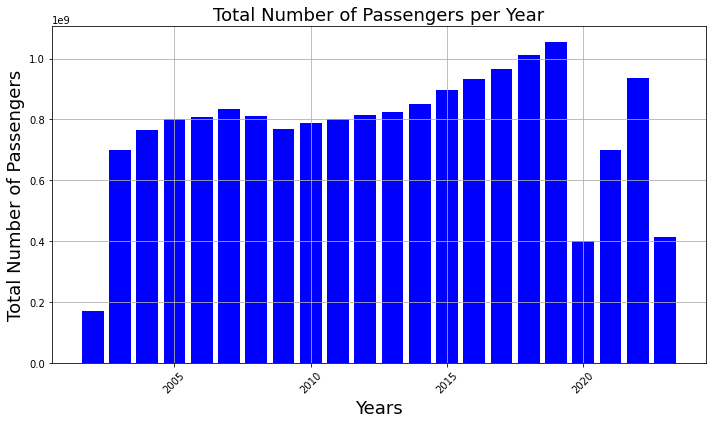

In [97]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='b')
plt.xlabel('Years', fontsize=18)
plt.ylabel('Total Number of Passengers', fontsize=18)
plt.title('Total Number of Passengers per Year', fontsize=18)
plt.xticks(rotation=45)  #

plt.grid(True)
plt.tight_layout()

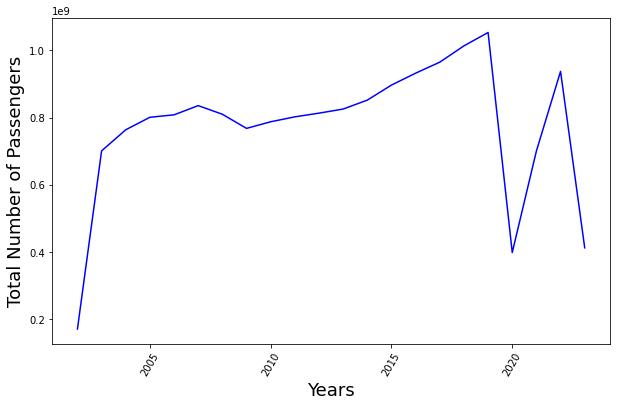

In [98]:
plt.figure(figsize=(10,6))
plt.plot(x,y, color = 'b')
plt.xlabel('Years', fontsize=18)
plt.ylabel('Total Number of Passengers', fontsize=18)
plt.xticks(rotation =60)
plt.show()

In [99]:
domestic = grouped_df['DOMESTIC']
international = grouped_df['INTERNATIONAL']
total = grouped_df['TOTAL']

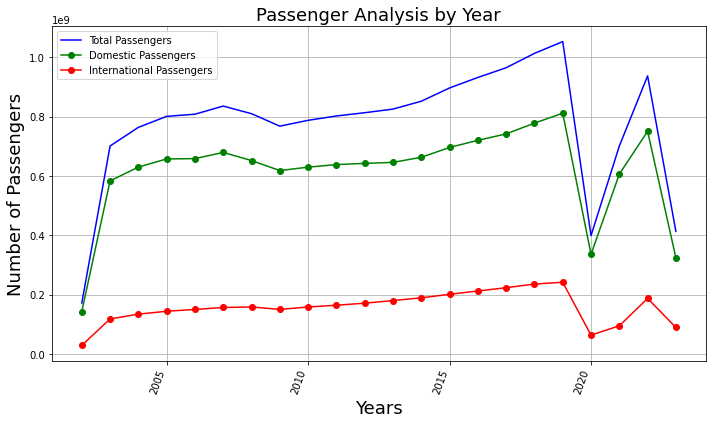

In [100]:
# Create a bar plot for 'TOTAL' passengers
plt.figure(figsize=(10, 6))
plt.plot(x, total, color='b', label='Total Passengers')

# Create line plots for 'DOMESTIC' and 'INTERNATIONAL' passengers
plt.plot(x, domestic, marker='o', color='g', label='Domestic Passengers')
plt.plot(x, international, marker='o', color='r', label='International Passengers')

plt.xlabel('Years', fontsize=18)
plt.ylabel('Number of Passengers', fontsize=18)
plt.title('Passenger Analysis by Year', fontsize=18)
plt.legend()  # Show legend for different lines
plt.xticks(rotation=70, ha='right')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()